Wygenerujmy zbiór danych wyglądający +- tak jak na załączonym rysunku. Uruchamiamy na nim algorytm k-means z k równym 9 i następującymi metodami inicjowania środków klastrów:

Random - z rozkładem jednostajnym po całym zakresie wartości

Forgy - wybieramy k elementów ze zbioru jako początkowe środki

Random Partition - losowo dzielimy zbiór na k klastrów, początkowy środek klastra to średnia z elementów które w ten sposób w nim się znalazły

k-means++ - wybieramy początkowe środki w sposób opisany w paperze z załącznika.

Naszym celem jest uzyskanie wykresu jakości klastryzacji Q w zależności od numeru iteracji n dla wszystkich powyższych metod (wszystkie wyniki na jednym wykresie). Jakość Q rozumiemy jako wybraną metrykę jakości (np. Davies-Bouldin index czy Dunn index, może być dowolna rozsądna inna - ale nie Silhouette). Proces k-means jest silnie stochastyczny, więc eksperyment powtarzamy wielokrotnie, a na wykresie pokazujemy średni wynik i jego odchylenie standardowe jako errorbary.

Następnie "psujemy zbiór", dokonując następujących zmian:
jeden z okręgów znacząco powiększamy
jeden czynimi znacząco gęściej zapełnionym
dwa zbliżamy mocno do siebie
jednemu zmieniamy kształt z okrągłego na wrzecionowaty
jeden znacząco oddalamy od pozostałych

Powtarzamy obliczenia dla zmodyfikowanego zbioru - jakie efekty teraz uzyskaliśmy? Jaki był stan końcowy?

Finalnie, dla obu zbiorów (oryginalnego i "zepsutego") uruchommy dla różnych k z zakresu od 1 do 20 i porównajmy finalne metryki jakości. Czy na ich podstawie można stwierdzić, że optymalne k to 9 (bo tyle mamy klastrów)?

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import itertools
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score

In [2]:
def points_set(x,y):
    X = np.random.normal(0,1,50).reshape(-1,1) + x
    Y = np.random.normal(0,1,50).reshape(-1,1) + y
    return np.concatenate((X,Y),axis=1)
    

In [3]:
x_offsets = y_offsets=[0,8,16]

In [4]:
offset_product = list(itertools.product(x_offsets,y_offsets))
offset_product

[(0, 0), (0, 8), (0, 16), (8, 0), (8, 8), (8, 16), (16, 0), (16, 8), (16, 16)]

In [5]:
data_set_1 = np.array([points_set(*p) for p in offset_product])

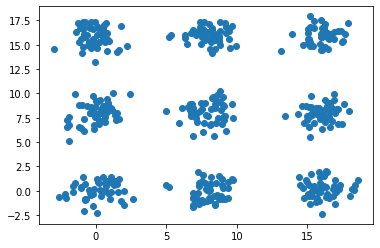

In [6]:
flat_data_set = data_set_1.reshape(-1,2)
plt.scatter(flat_data_set[:,0],flat_data_set[:,1])

In [7]:
frog = flat_data_set[np.random.choice(flat_data_set.shape[0], 9, replace=False)]
random_partial = KMeans(n_clusters=9,n_jobs=-1,max_iter=1).fit(flat_data_set).cluster_centers_

In [8]:
kmeans_random=KMeans(n_clusters=9, init='random',n_jobs=-1)
kmeans_plus=KMeans(n_clusters=9, init='k-means++',n_jobs=-1)
kmeans_froggy=KMeans(n_clusters=9, init=frog,n_jobs=-1,n_init=1)
kmeans_random_partition=KMeans(n_clusters=9, init=random_partial,n_jobs=-1,n_init=1)

In [9]:
colors=np.array(['maroon','g','b','gold','coral','r','silver','palegreen','m'])

In [10]:
rr=kmeans_random.fit_predict(flat_data_set)
pp=kmeans_plus.fit_predict(flat_data_set)
ff=kmeans_froggy.fit_predict(flat_data_set)
pr=kmeans_random_partition.fit_predict(flat_data_set)

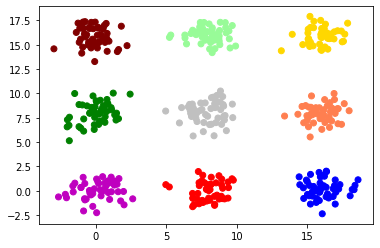

In [11]:
plt.scatter(flat_data_set[:,0],flat_data_set[:,1],color=colors[rr])

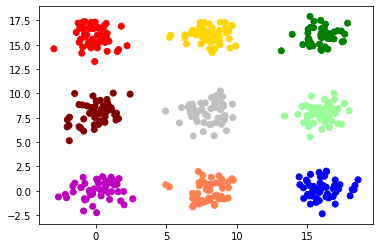

In [12]:
plt.scatter(flat_data_set[:,0],flat_data_set[:,1],color=colors[pp])

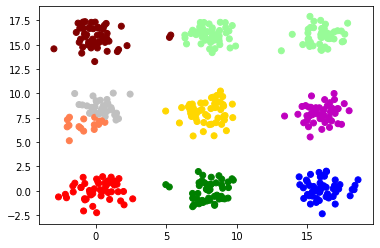

In [13]:
plt.scatter(flat_data_set[:,0],flat_data_set[:,1],color=colors[ff])

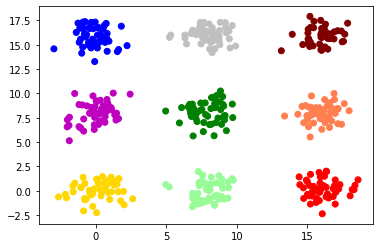

In [14]:
plt.scatter(flat_data_set[:,0],flat_data_set[:,1],color=colors[pr])

In [15]:
max_iteration = 300
scores = {
    'kmeans_random' : [],
    'kmeans_plus' : [],
    'kmeans_froggy' : [],
    'kmeans_random_partition' : [],
}

X = flat_data_set

for i in range(1,max_iteration,30):
    
    frog = flat_data_set[np.random.choice(flat_data_set.shape[0], 9, replace=False)]
    random_partial = KMeans(n_clusters=9,n_jobs=-1,max_iter=1).fit(flat_data_set).cluster_centers_
    
    kmeans_random=KMeans(n_clusters=9, init='random',n_jobs=-1,max_iter=i)
    kmeans_plus=KMeans(n_clusters=9, init='k-means++',n_jobs=-1,max_iter=i)
    kmeans_froggy=KMeans(n_clusters=9, init=frog,n_jobs=-1,n_init=1,max_iter=i)
    kmeans_random_partition=KMeans(n_clusters=9, init=random_partial,n_jobs=-1,n_init=1,max_iter=i)
    
    kmeans_random_score = []
    kmeans_plus_score = []
    kmeans_froggy_score = []
    kmeans_random_partition_score = []
    for _ in range(3):
        kmeans_random_score += [davies_bouldin_score(X,kmeans_random.fit_predict(X))]
        kmeans_plus_score += [davies_bouldin_score(X,kmeans_plus.fit_predict(X))]
        kmeans_froggy_score += [davies_bouldin_score(X,kmeans_froggy.fit_predict(X))]
        kmeans_random_partition_score += [davies_bouldin_score(X,kmeans_random_partition.fit_predict(X))]
        
    kmeans_random_score = np.array(kmeans_random_score).mean()
    kmeans_plus_score = np.array(kmeans_plus_score).mean()
    kmeans_froggy_score = np.array(kmeans_froggy_score).mean()
    kmeans_random_partition_score = np.array(kmeans_random_partition_score).mean()
    
    scores['kmeans_random'] += [kmeans_random_score]
    scores['kmeans_plus'] += [kmeans_plus_score]
    scores['kmeans_froggy'] += [kmeans_froggy_score]
    scores['kmeans_random_partition'] += [kmeans_random_partition_score]

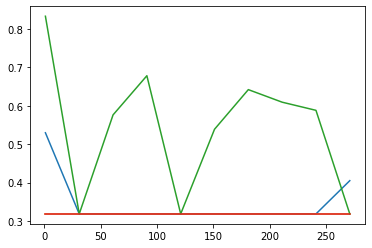

In [16]:
plt.plot(np.arange(1,max_iteration,30),scores['kmeans_random'])
plt.plot(np.arange(1,max_iteration,30),scores['kmeans_plus'])
plt.plot(np.arange(1,max_iteration,30),scores['kmeans_froggy'])
plt.plot(np.arange(1,max_iteration,30),scores['kmeans_random_partition'])

In [17]:
data_set_2 = data_set_1

In [18]:
X = np.random.normal(0,1,50).reshape(-1,1)*4 + 16
Y = np.random.normal(0,1,50).reshape(-1,1) + 16
A= np.concatenate((X,Y),axis=1)
data_set_2[-1] = A

In [19]:
X = np.random.normal(0,1,50).reshape(-1,1)*2 + 8
Y = np.random.normal(0,1,50).reshape(-1,1)*2 + 8
B = np.concatenate((X,Y),axis=1)
data_set_2[4] = B

In [20]:
X = np.random.normal(0,1,50).reshape(-1,1) + 0
Y = np.random.normal(0,1,50).reshape(-1,1) + 4
C= np.concatenate((X,Y),axis=1)
data_set_2[1] = C

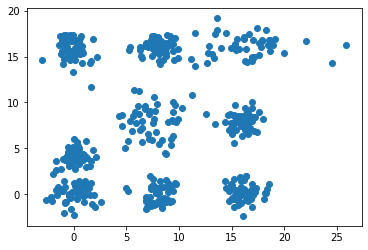

In [21]:
flat_data_set_2 = data_set_2.reshape(-1,2)
plt.scatter(flat_data_set_2[:,0],flat_data_set_2[:,1])

In [22]:
max_iteration = 300
scores = {
    'kmeans_random' : [],
    'kmeans_plus' : [],
    'kmeans_froggy' : [],
    'kmeans_random_partition' : [],
}

X = flat_data_set_2

for i in range(1,max_iteration,30):
    
    frog = flat_data_set[np.random.choice(flat_data_set.shape[0], 9, replace=False)]
    random_partial = KMeans(n_clusters=9,n_jobs=-1,max_iter=1).fit(flat_data_set).cluster_centers_
    
    kmeans_random=KMeans(n_clusters=9, init='random',n_jobs=-1,max_iter=i)
    kmeans_plus=KMeans(n_clusters=9, init='k-means++',n_jobs=-1,max_iter=i)
    kmeans_froggy=KMeans(n_clusters=9, init=frog,n_jobs=-1,n_init=1,max_iter=i)
    kmeans_random_partition=KMeans(n_clusters=9, init=random_partial,n_jobs=-1,n_init=1,max_iter=i)
    
    kmeans_random_score = []
    kmeans_plus_score = []
    kmeans_froggy_score = []
    kmeans_random_partition_score = []
    for _ in range(10):
        kmeans_random_score += [davies_bouldin_score(X,kmeans_random.fit_predict(X))]
        kmeans_plus_score += [davies_bouldin_score(X,kmeans_plus.fit_predict(X))]
        kmeans_froggy_score += [davies_bouldin_score(X,kmeans_froggy.fit_predict(X))]
        kmeans_random_partition_score += [davies_bouldin_score(X,kmeans_random_partition.fit_predict(X))]
        
    kmeans_random_score = np.array(kmeans_random_score).mean()
    kmeans_plus_score = np.array(kmeans_plus_score).mean()
    kmeans_froggy_score = np.array(kmeans_froggy_score).mean()
    kmeans_random_partition_score = np.array(kmeans_random_partition_score).mean()
    
    scores['kmeans_random'] += [kmeans_random_score]
    scores['kmeans_plus'] += [kmeans_plus_score]
    scores['kmeans_froggy'] += [kmeans_froggy_score]
    scores['kmeans_random_partition'] += [kmeans_random_partition_score]

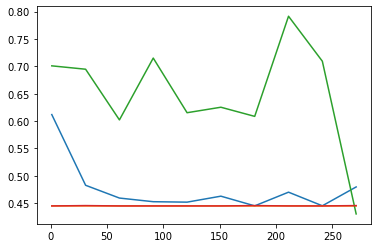

In [23]:
plt.plot(np.arange(1,max_iteration,30),scores['kmeans_random'])
plt.plot(np.arange(1,max_iteration,30),scores['kmeans_plus'])
plt.plot(np.arange(1,max_iteration,30),scores['kmeans_froggy'])
plt.plot(np.arange(1,max_iteration,30),scores['kmeans_random_partition'])

In [24]:
k = 20
scores = {
    'kmeans_random' : [],
    'kmeans_plus' : [],
    'kmeans_froggy' : [],
    'kmeans_random_partition' : [],
}

X = flat_data_set

for kk in range(2,k,2):
    
    frog = flat_data_set[np.random.choice(flat_data_set.shape[0], kk, replace=False)]
    random_partial = KMeans(n_clusters=kk,n_jobs=-1,max_iter=1).fit(flat_data_set).cluster_centers_
    
    kmeans_random=KMeans(n_clusters=kk, init='random',n_jobs=-1)
    kmeans_plus=KMeans(n_clusters=kk, init='k-means++',n_jobs=-1)
    kmeans_froggy=KMeans(n_clusters=kk, init=frog,n_jobs=-1,n_init=1)
    kmeans_random_partition=KMeans(n_clusters=kk, init=random_partial,n_jobs=-1,n_init=1)
    
    
    kmeans_random_score = []
    kmeans_plus_score = []
    kmeans_froggy_score = []
    kmeans_random_partition_score = []
    for _ in range(3):
        kmeans_random_score += [davies_bouldin_score(X,kmeans_random.fit_predict(X))]
        kmeans_plus_score += [davies_bouldin_score(X,kmeans_plus.fit_predict(X))]
        kmeans_froggy_score += [davies_bouldin_score(X,kmeans_froggy.fit_predict(X))]
        kmeans_random_partition_score += [davies_bouldin_score(X,kmeans_random_partition.fit_predict(X))]
        
    kmeans_random_score = np.array(kmeans_random_score).mean()
    kmeans_plus_score = np.array(kmeans_plus_score).mean()
    kmeans_froggy_score = np.array(kmeans_froggy_score).mean()
    kmeans_random_partition_score = np.array(kmeans_random_partition_score).mean()
    
    scores['kmeans_random'] += [kmeans_random_score]
    scores['kmeans_plus'] += [kmeans_plus_score]
    scores['kmeans_froggy'] += [kmeans_froggy_score]
    scores['kmeans_random_partition'] += [kmeans_random_partition_score]

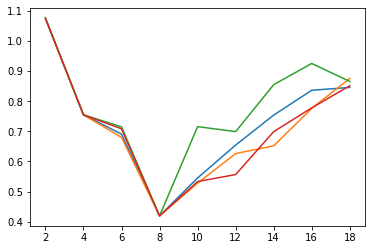

In [25]:
plt.plot(np.arange(2,k,2),scores['kmeans_random'])
plt.plot(np.arange(2,k,2),scores['kmeans_plus'])
plt.plot(np.arange(2,k,2),scores['kmeans_froggy'])
plt.plot(np.arange(2,k,2),scores['kmeans_random_partition'])

In [26]:
k = 20
scores = {
    'kmeans_random' : [],
    'kmeans_plus' : [],
    'kmeans_froggy' : [],
    'kmeans_random_partition' : [],
}

X = flat_data_set_2

for kk in range(2,k,2):
    
    frog = flat_data_set[np.random.choice(flat_data_set.shape[0], kk, replace=False)]
    random_partial = KMeans(n_clusters=kk,n_jobs=-1,max_iter=1).fit(flat_data_set).cluster_centers_
    
    kmeans_random=KMeans(n_clusters=kk, init='random',n_jobs=-1)
    kmeans_plus=KMeans(n_clusters=kk, init='k-means++',n_jobs=-1)
    kmeans_froggy=KMeans(n_clusters=kk, init=frog,n_jobs=-1,n_init=1)
    kmeans_random_partition=KMeans(n_clusters=kk, init=random_partial,n_jobs=-1,n_init=1)
    
    
    kmeans_random_score = []
    kmeans_plus_score = []
    kmeans_froggy_score = []
    kmeans_random_partition_score = []
    for _ in range(3):
        kmeans_random_score += [davies_bouldin_score(X,kmeans_random.fit_predict(flat_data_set))]
        kmeans_plus_score += [davies_bouldin_score(X,kmeans_plus.fit_predict(flat_data_set))]
        kmeans_froggy_score += [davies_bouldin_score(X,kmeans_froggy.fit_predict(flat_data_set))]
        kmeans_random_partition_score += [davies_bouldin_score(X,kmeans_random_partition.fit_predict(flat_data_set))]
        
    kmeans_random_score = np.array(kmeans_random_score).mean()
    kmeans_plus_score = np.array(kmeans_plus_score).mean()
    kmeans_froggy_score = np.array(kmeans_froggy_score).mean()
    kmeans_random_partition_score = np.array(kmeans_random_partition_score).mean()
    
    scores['kmeans_random'] += [kmeans_random_score]
    scores['kmeans_plus'] += [kmeans_plus_score]
    scores['kmeans_froggy'] += [kmeans_froggy_score]
    scores['kmeans_random_partition'] += [kmeans_random_partition_score]

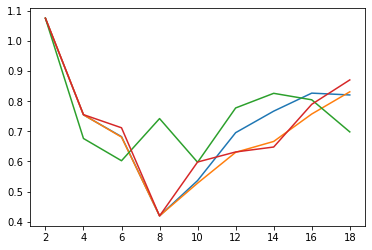

In [31]:
plt.plot(np.arange(2,k,2),scores['kmeans_random'])
plt.plot(np.arange(2,k,2),scores['kmeans_plus'])
plt.plot(np.arange(2,k,2),scores['kmeans_froggy'])
plt.plot(np.arange(2,k,2),scores['kmeans_random_partition'])